# Assignment 2 - Clustering
## Visualizing High Dimensional Data
### Michael Young / u0742759

### Problem 1 (50pts):

**(10 pts): Implement PCA as a function and provide a commented version of it. Feel free to compute eigenvectors, eigenvalues etc. using numpy or other api functionality.**

In [223]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Loading iris data for use with PCA
data = load_iris()
# data points
X = data.data
# labels
Y = data.target
# label names
labels = list(data.target_names)


In [224]:
# PCA function

def pca(data,n_components):
    '''Principal component analysis implementation
    input: array, number of components we want to project to
    output: coords of PCA output with corresponding nu
    '''
    ## Step 1: Standardize data (Should I be just zero-centering here instead?)
    
    # init new standardized array
    data_std = np.empty((data.shape))
    for i in range(data.shape[1]):
        mean = np.mean(data[:,i])
        std = np.std(data[:,i])
        data_std[:,i] = (data[:,i] - mean)/std
    #print("standardized data in my func:",data_std[1:5])
    
    ## Step 2: Covariance matrix computation
    cov = np.cov(data_std,rowvar=False)
    #print(cov)
    
    ## Step 3: Compute eigenvalues and eigenvectors of covariance matrix
    eigenvals, eigenvects = np.linalg.eig(cov)
    #print("vals",eigenvals,"vectors",eigenvects)
    
    # pair eigenvals and vectors
    eigs = list(zip(eigenvals,eigenvects.T))
    #print("my eigs",eigs)
    
    # sort eigs
    sorted_eigs = sorted(eigs)
    #print("sorted",sorted_eigs)
    
    ## Step 4: Feature vector
    feat_vect = np.empty((data.shape[1],n_components))
    for i in range(n_components):
        feat_vect[:,i] = sorted_eigs.pop()[1]
    print("My components:",feat_vect.T)
    
    ## Step 5: Recast the data
    return data_std.dot(feat_vect)
    

**(10 pts): Plot (with a scatter plot) the iris dataset using your PCA implementation. Color each of the species differently. On a separate plot provide a scatter plot of the language api (sklearn) PCA for comparison.**

My components: [[ 0.5211 -0.2693  0.5804  0.5649]
 [-0.3774 -0.9233 -0.0245 -0.0669]]
SKlearn's components: [[ 0.5211 -0.2693  0.5804  0.5649]
 [ 0.3774  0.9233  0.0245  0.0669]]


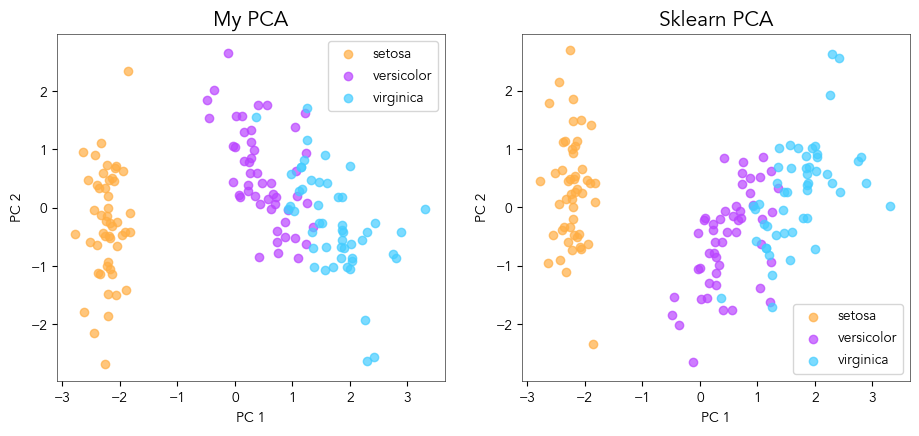

In [225]:
# Number of components I want to use for PCA 
k = 2

# My PCA implementation
myPCA = pca(X,k)
# sklearn's PCA 
model = PCA(n_components = k)
# Standardize data for skPCA
X_std = StandardScaler().fit_transform(X)
skPCA = model.fit_transform(X_std)
print("SKlearn's components:",model.components_)
#print(X_std[1:5])
#print(skPCA)
#print(myPCA)


# Let's plot
plt.style.use('default')
plt.rcParams['font.family'] = 'Avenir'
plt.figure(figsize = (11,4.5))
colors = ['#ffae44','#ba44ff','#44cdff']

# My PCA
plt.subplot(1,2,1)
#plt.scatter(myPCA[:,0],myPCA[:,1],alpha=0.5)
for c, i, lab in zip(colors, [0, 1, 2], labels):
   plt.scatter(myPCA[Y==i,0], myPCA[Y==i,1], alpha=0.7, c=c, label=lab)
plt.legend()
plt.title('My PCA',fontsize=15)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
#plt.axis('off')
# for spine in plt.gca().spines.values():
#     spine.set_visible(False)
[i.set_linewidth(0.4) for i in plt.gca().spines.values()]


# SKLEARN PCA
plt.subplot(1,2,2)
#plt.scatter(skPCA[:,0],skPCA[:,1],alpha=0.5)
for c, i, lab in zip(colors, [0, 1, 2], labels):
   plt.scatter(skPCA[Y==i,0], skPCA[Y==i,1], alpha=0.7, c=c, label=lab)

plt.legend()
plt.title("Sklearn PCA",fontsize=15)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
#plt.axis('off')
# for spine in plt.gca().spines.values():
#     spine.set_visible(False)
[i.set_linewidth(0.4) for i in plt.gca().spines.values()]

    
plt.show()

The data was standardized before running PCA on it, i.e. $ X = \frac{value - mean}{std} $. As you can see, these outputs are the same, but the y values are flipped between them. This is due to the respective functions finding equivalent eigenvectors, but with signs flipped for the second component (see print out above). I can simply multiply the Y's by -1 to fix this, but I thought the difference was interesting.

**(10 pts): Run K-Means on these results with k=2 and plot the results color according to cluster.**  

Because my PCA results are equivalent to the sklearn results, I'll just run K-means on one of them (mine).


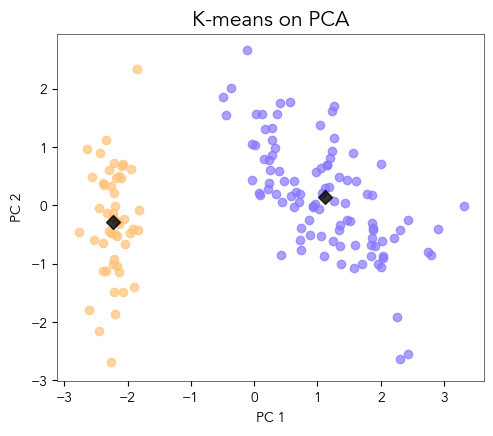

In [236]:
# K - Means 
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=2, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=42
)

y_km = km.fit_predict(myPCA)

plt.figure(figsize = (5.5,4.5))
plt.scatter(myPCA[y_km == 0, 0],myPCA[y_km == 0, 1],c="#8679ff",alpha=0.7)
plt.scatter(myPCA[y_km == 1, 0],myPCA[y_km == 1, 1],c="#ffc379",alpha=0.7)
# Plot the centers
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c="k",alpha=0.8,s=50,marker="D")
plt.title("K-means on PCA",fontsize=15)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
[i.set_linewidth(0.4) for i in plt.gca().spines.values()]

plt.show()


This k=2 k-means implementation clusters these about how we'd expect. It'd be more interesting to see how close a 3 clustering could get to the actual results. 

**(10 pts): Now create an alternate PCA function where you do not center the data. Using a scatter plot, show the results. Again, color each of the species differently.**

I'll just copy my old function and remove the centering/standardization logic from it.
 

In [238]:
# PCA w/out standardization or centering


def pca_reloaded(data,n_components):
    '''Principal component analysis implementation
    input: array, number of components we want to project to
    output: coords of PCA output with corresponding nu
    '''
  
    ## Step 2: Covariance matrix computation
    cov = np.cov(data,rowvar=False)
    
    ## Step 3: Compute eigenvalues and eigenvectors of covariance matrix
    eigenvals, eigenvects = np.linalg.eig(cov)
    
    # pair eigenvals and vectors
    eigs = list(zip(eigenvals,eigenvects.T))
    
    # sort eigs
    sorted_eigs = sorted(eigs)
    
    ## Step 4: Feature vector
    feat_vect = np.empty((data.shape[1],n_components))
    for i in range(n_components):
        feat_vect[:,i] = sorted_eigs.pop()[1]
    
    ## Step 5: Recast the data
    return data.dot(feat_vect)


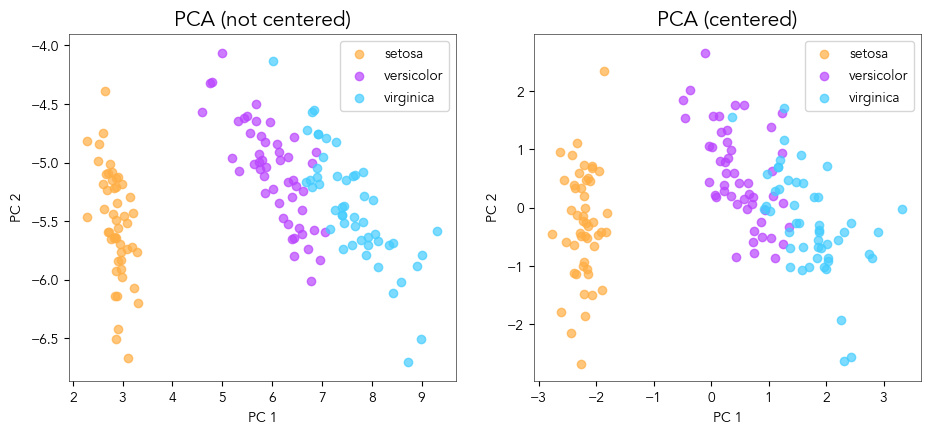

In [243]:
# Now let's plot results and compare to original

pcaNC = pca_reloaded(X,2)

plt.figure(figsize = (11,4.5))
plt.subplot(1,2,1)
for c, i, lab in zip(colors, [0, 1, 2], labels):
   plt.scatter(pcaNC[Y==i,0], pcaNC[Y==i,1], alpha=0.7, c=c, label=lab)
plt.legend()
plt.title('PCA (not centered)',fontsize=15)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
[i.set_linewidth(0.4) for i in plt.gca().spines.values()]

# My PCA
plt.subplot(1,2,2)
for c, i, lab in zip(colors, [0, 1, 2], labels):
   plt.scatter(myPCA[Y==i,0], myPCA[Y==i,1], alpha=0.7, c=c, label=lab)
plt.legend()
plt.title('PCA (centered)',fontsize=15)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
[i.set_linewidth(0.4) for i in plt.gca().spines.values()]

plt.show()

**(10 pts): What is the effect of neglecting to center the data? What type of data would not work well for PCA and why?**  

Frankly, in this instance, the effect is pretty minimal. Honestly, the data looks a little better without the centering. The verisicolor and virginica are more separated. This wouldn't always be the case obviously, or else we would never center and standardize our data before running PCA. In this particular instance, centering doesn't produce any huge benefit because all of our features were in the same units (centimeters) and had very similar ranges. However, if our features were all different units and had wildly varying magnitudes, this would not work well with PCA. The larger features would be inordinately biased towards in the principal component selection process. 

### Problem 2 (20 pts):

